In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import pydicom
import matplotlib.pyplot as plt
import imageio
import cv2
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory



# Any results you write to the current directory are saved as output.

In [2]:
cd ../input/

/kaggle/input


In [3]:
cd second-annual-data-science-bowl/

/kaggle/input/second-annual-data-science-bowl


In [4]:
cd train

/kaggle/input/second-annual-data-science-bowl/train


In [5]:
patient_list=os.listdir("train/")
print(patient_list)

['460', '333', '195', '231', '496', '255', '337', '25', '486', '15', '284', '376', '365', '377', '342', '366', '158', '480', '61', '183', '405', '46', '356', '301', '453', '455', '398', '79', '317', '234', '106', '193', '474', '151', '59', '441', '62', '314', '330', '332', '368', '18', '96', '187', '289', '286', '227', '440', '98', '463', '403', '213', '101', '45', '370', '415', '295', '71', '73', '411', '63', '31', '492', '387', '218', '264', '24', '303', '462', '279', '37', '277', '458', '118', '327', '478', '217', '154', '469', '479', '444', '224', '349', '54', '239', '77', '89', '389', '384', '292', '394', '10', '381', '229', '226', '258', '40', '134', '100', '408', '124', '274', '422', '109', '180', '278', '324', '36', '281', '236', '169', '130', '197', '132', '263', '390', '471', '5', '438', '418', '380', '290', '246', '298', '184', '108', '38', '412', '166', '148', '487', '137', '7', '401', '2', '81', '113', '268', '386', '256', '273', '413', '299', '245', '52', '321', '476', '5

In [6]:
path="train/"+patient_list[3]+"/study"
patient_files=os.listdir(path) 
print(patient_files)

['sax_7', 'sax_13', 'sax_15', 'sax_14', 'sax_9', '2ch_17', 'sax_10', 'sax_8', 'sax_12', '4ch_18', 'sax_6', 'sax_11']


# **Dataset Statistics**

In [7]:
for patient in patient_list:
    path="train/"+patient+"/study"
    patient_files=os.listdir(path)
    print("patient: "+ patient+"   sub dirs: "+str(len(patient_files)))

patient: 460   sub dirs: 11
patient: 333   sub dirs: 14
patient: 195   sub dirs: 18
patient: 231   sub dirs: 12
patient: 496   sub dirs: 11
patient: 255   sub dirs: 12
patient: 337   sub dirs: 12
patient: 25   sub dirs: 11
patient: 486   sub dirs: 14
patient: 15   sub dirs: 13
patient: 284   sub dirs: 13
patient: 376   sub dirs: 12
patient: 365   sub dirs: 11
patient: 377   sub dirs: 13
patient: 342   sub dirs: 11
patient: 366   sub dirs: 12
patient: 158   sub dirs: 12
patient: 480   sub dirs: 11
patient: 61   sub dirs: 13
patient: 183   sub dirs: 12
patient: 405   sub dirs: 13
patient: 46   sub dirs: 12
patient: 356   sub dirs: 15
patient: 301   sub dirs: 11
patient: 453   sub dirs: 13
patient: 455   sub dirs: 12
patient: 398   sub dirs: 13
patient: 79   sub dirs: 14
patient: 317   sub dirs: 10
patient: 234   sub dirs: 4
patient: 106   sub dirs: 11
patient: 193   sub dirs: 13
patient: 474   sub dirs: 13
patient: 151   sub dirs: 11
patient: 59   sub dirs: 12
patient: 441   sub dirs: 13

# **Figuring out the number of short axis slices files per patient**

In [8]:
_max=0
_min=10
_sum=0
for patient in patient_list:
    num=0
    path="train/"+patient+"/study"
    patient_files=os.listdir(path)
    for pat in patient_files:
        if pat[:4]=="sax_":
            num+=1
    _sum+=num
    if(num>_max):
        _max=num
    if(num<_min):
        _min=num
    #print("patient: "+ patient+"   sub dirs: "+str(num))

    
print("===================================== END =============================================")
print("max: "+ str(_max))
print("min: "+ str(_min))
print("avg: "+ str(_sum/len(patient_list)))

===================================== END =============================================
max: 22
min: 1
avg: 10.662


# **let's have fun with the stats**

In [9]:
def find_less(m):
    count=0
    for patient in patient_list:
        num=0
        path="train/"+patient+"/study"
        patient_files=os.listdir(path)
        for pat in patient_files:
            if pat[:4]=="sax_":
                 num+=1
        if(num<m):
            print("patient: "+patient+ "number of sax: "+ str(num))
            count+=1
    return count/len(patient_list)*100

def find_more(m):
    count=0
    for patient in patient_list:
        num=0
        path="train/"+patient+"/study"
        patient_files=os.listdir(path)
        for pat in patient_files:
            if pat[:4]=="sax_":
                 num+=1
        if(num>m):
            print("patient: "+patient+ "number of sax: "+ str(num))
            count+=1
    return count/len(patient_list)


In [10]:
res=find_more(21)
print(res)

patient: 436number of sax: 22
0.002


# **Now let's see what's inside**

In [11]:
#let's check patient 307 

path="train/307/study"
patient_files=os.listdir(path)
print(patient_files)

['sax_16', 'sax_19', 'sax_26', 'sax_29', 'sax_20', 'sax_27', '4ch_15', 'sax_22', 'sax_17', 'sax_21', 'sax_25', '2ch_13', 'sax_23', 'sax_30', 'sax_18', 'sax_24', 'sax_28']


In [12]:
folder="sax_26"
images=os.listdir(path+"/"+folder)
slice=pydicom.dcmread(path+"/"+folder+"/"+images[1])
print(slice)

(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'M', 'RETRO', 'NORM', 'DIS2D', 'FM4_2', 'FIL']
(0008, 0013) Instance Creation Time              TM: '111112.276000'
(0008, 0016) SOP Class UID                       UI: MR Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.3.6.1.4.1.9590.100.1.2.119887653712639094306559968391779622043
(0008, 0030) Study Time                          TM: '103224.910000'
(0008, 0031) Series Time                         TM: '111111.576000'
(0008, 0032) Acquisition Time                    TM: '111106.087500'
(0008, 0060) Modality                            CS: 'MR'
(0008, 0070) Manufacturer                        LO: 'SIEMENS'
(0008, 103e) Series Description                  LO: 'sax'
(0008, 1090) Manufacturer's Model Name           LO: 'Aera'
(0008, 1110)  Referenced Study Sequence   1 item(s) ---- 
   (0008, 1150) Referenced SOP Class UID        

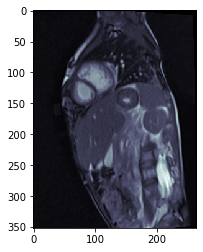

In [13]:
plt.imshow(slice.pixel_array,cmap=plt.cm.bone)

In [14]:
#list=os.listdir(path+"/"+folder)
#vol=imageio.volread(path+"/"+folder)

In [15]:
def get_sax(patient):
    sax_files=[]
    path="train/"+str(patient)+"/study"
    files=os.listdir(path)
    for file in files:
        if file[0]=="s":
            sax_files.append(file)
    sax_files=sorted(sax_files,key=lambda st:int(st[4:]))
    return sax_files
#p_436=get_sax(436)
#print(p_436)

def get_slices(patient,dir):
    slices=[]
    path="train/"+str(patient)+"/study/"+dir
    slices_path=os.listdir(path)
    slices = [pydicom.dcmread(path + "/" + s) for s in  os.listdir(path)]
    
    return slices

#p_436_sax_11=get_slices(436,"sax_11")


In [16]:
p_436=get_sax(436)
print(p_436)

['sax_6', 'sax_7', 'sax_8', 'sax_9', 'sax_10', 'sax_11', 'sax_12', 'sax_13', 'sax_14', 'sax_15', 'sax_16', 'sax_17', 'sax_21', 'sax_33', 'sax_34', 'sax_35', 'sax_36', 'sax_37', 'sax_38', 'sax_39', 'sax_40', 'sax_41']


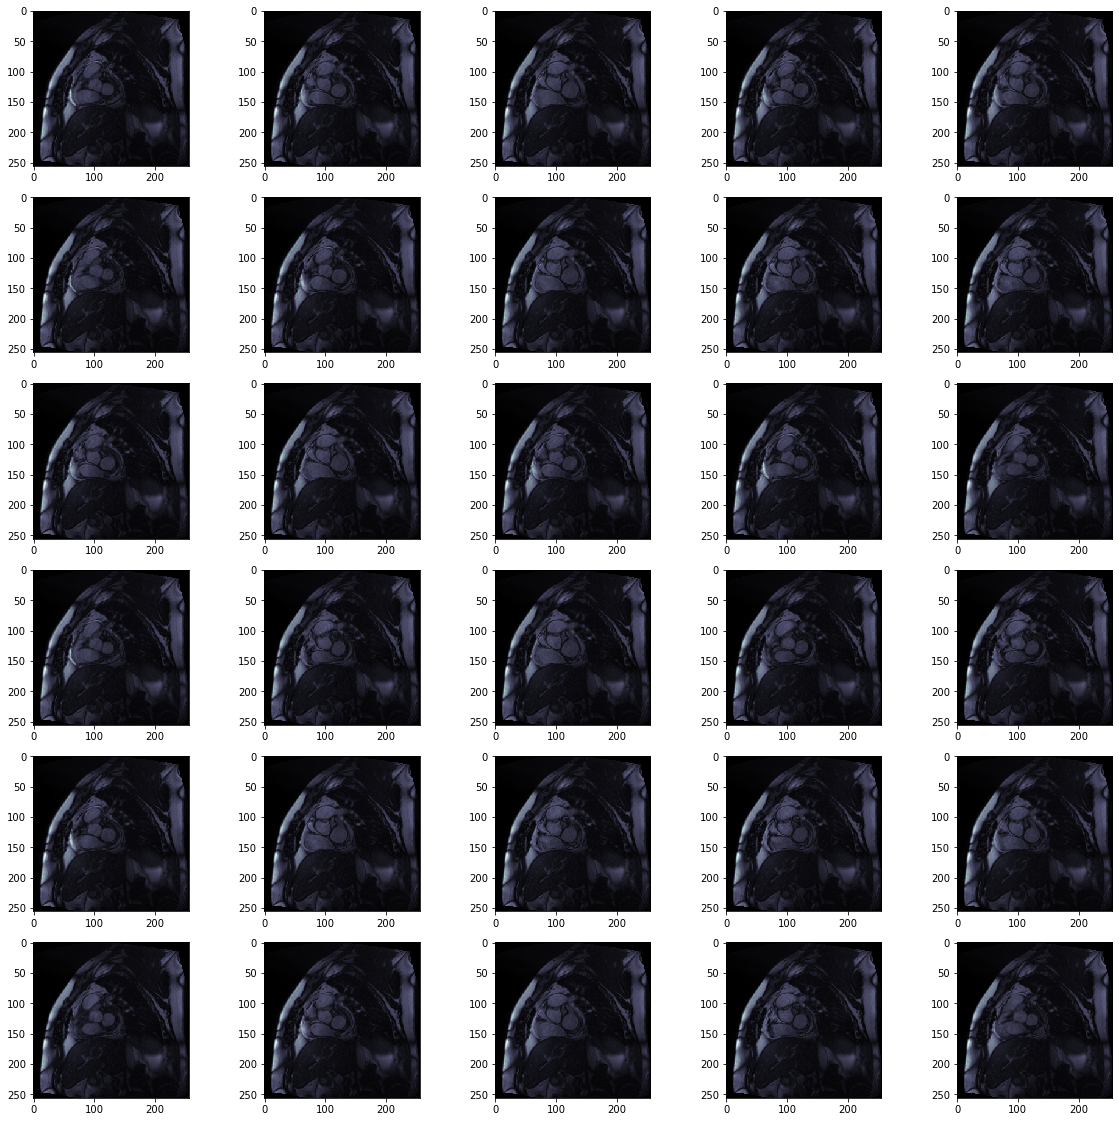

In [17]:
p_436_sax_11=get_slices(436,"sax_21")
fig=plt.figure(figsize=(20, 20))
columns=5
rows=6
for i in range(1,columns*rows+1):
    fig.add_subplot(rows,columns,i)
    image=p_436_sax_11[i-1].pixel_array
    plt.imshow(image,cmap=plt.cm.bone)
plt.show()

In [18]:
def get_one_each(patient,num):
    """returns a collection of frames at the same time"""
    files=get_sax(patient)
    images=[]
    for file in files:
        path="train/"+str(patient)+"/study/"+file
        image_paths=os.listdir(path)
        slice=pydicom.dcmread(path+"/"+image_paths[num])
        images.append(slice)
    return images
        
        

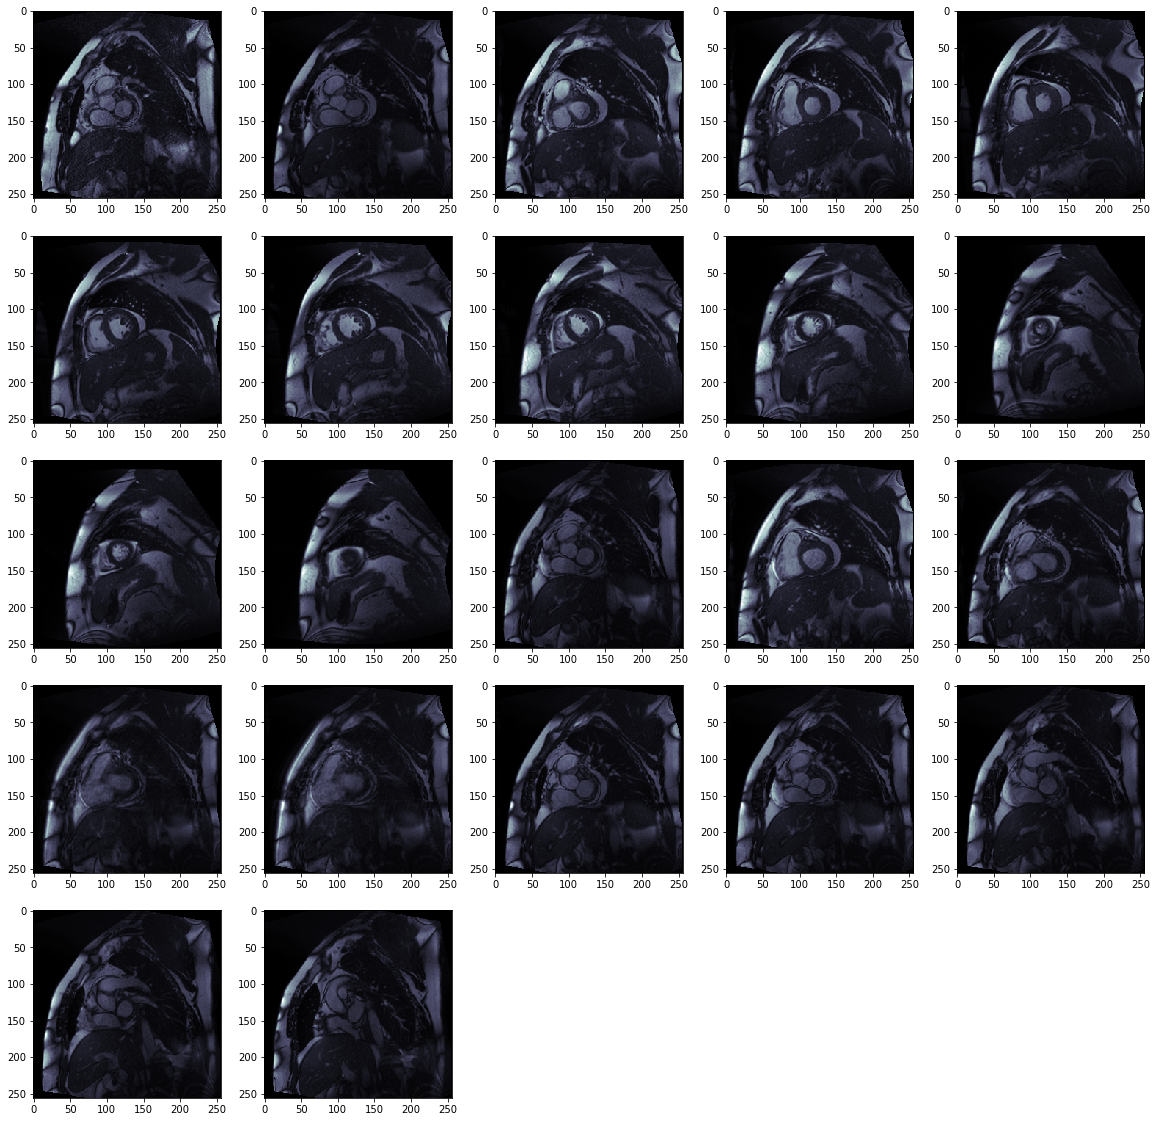

In [19]:
im=get_one_each(436,3)
fig=plt.figure(figsize=(20, 20))
columns=5
rows=5
for i in range(1,columns*rows+1):
    fig.add_subplot(rows,columns,i)
    image=im[i-1].pixel_array
    plt.imshow(image,cmap=plt.cm.bone)
    if(i>=22):
        break
plt.show()

In [20]:
#resizing images:
original_image=test[0]
resized=cv2.resize(original_image,(100,100))
plt.imshow(resized,cmap="gray")
plt.figure()
plt.imshow(original_image,cmap="gray")
print(resized.shape)
print(original_image.shape)

NameError: name 'test' is not defined